# Set up (+ reproducible results)

In [1]:
import numpy as np
import tensorflow as tf
import random as rn
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import os
os.environ['PYTHONHASHSEED'] = '0'

In [3]:
# Setting the seed for numpy-generated random numbers
np.random.seed(54)

In [4]:
# Setting the seed for Python random numbers
rn.seed(28)

In [5]:
tf.set_random_seed(753)

In [6]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [7]:
train_path = 'towels/train/'
valid_path = 'towels/validate/'
test_path = 'towels/test/'

In [8]:
train_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, 
                                   shear_range=0.15, zoom_range=0.1,
                                   channel_shift_range=10., horizontal_flip=False)

In [9]:
#train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['True', 'False'], batch_size=10) 
train_batches = train_datagen.flow_from_directory(train_path, target_size=(224,224), classes=['True', 'False'], batch_size=10) 
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['True', 'False'], batch_size=4) 
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['True', 'False'], batch_size=28) 

Found 239 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [10]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [11]:
imgs, labels = next(train_batches)

/home/laus/.virtualenvs/virtual-py3/lib/python3.5/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


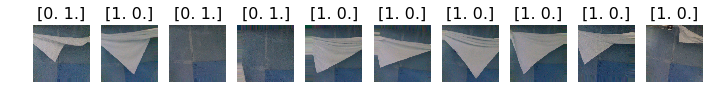

In [12]:
plots(imgs, titles=labels)

# Build and train CNN

# Predict

# Build Fine-tuned VGG16 model

In [110]:
vgg16_model = keras.applications.vgg16.VGG16()

In [111]:
type(vgg16_model)

keras.engine.training.Model

In [112]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [113]:
for layer in model.layers:
    layer.trainable = False

In [114]:
model.add(Dense(2, activation='softmax'))

# Train the fine-tuned VGG16 model

In [115]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [116]:
history = model.fit_generator(train_batches, steps_per_epoch=24,
                   validation_data=valid_batches, validation_steps=12, epochs=25, verbose=2, use_multiprocessing=True)

Epoch 1/25
 - 3s - loss: 0.9004 - acc: 0.5644 - val_loss: 0.9273 - val_acc: 0.6596
Epoch 2/25
 - 3s - loss: 0.5182 - acc: 0.7695 - val_loss: 0.4034 - val_acc: 0.8723
Epoch 3/25
 - 3s - loss: 0.3876 - acc: 0.8116 - val_loss: 0.3444 - val_acc: 0.8298
Epoch 4/25
 - 3s - loss: 0.2849 - acc: 0.8833 - val_loss: 0.1806 - val_acc: 1.0000
Epoch 5/25
 - 3s - loss: 0.2547 - acc: 0.8908 - val_loss: 0.2425 - val_acc: 0.9362
Epoch 6/25
 - 3s - loss: 0.2275 - acc: 0.9162 - val_loss: 0.1652 - val_acc: 0.9574
Epoch 7/25
 - 3s - loss: 0.2877 - acc: 0.8616 - val_loss: 0.2108 - val_acc: 0.9787
Epoch 8/25
 - 3s - loss: 0.2289 - acc: 0.8958 - val_loss: 0.1926 - val_acc: 0.9787
Epoch 9/25
 - 3s - loss: 0.1852 - acc: 0.9333 - val_loss: 0.1783 - val_acc: 0.9574
Epoch 10/25
 - 3s - loss: 0.1878 - acc: 0.9250 - val_loss: 0.1304 - val_acc: 1.0000
Epoch 11/25
 - 3s - loss: 0.1642 - acc: 0.9537 - val_loss: 0.1731 - val_acc: 0.9787
Epoch 12/25
 - 3s - loss: 0.2010 - acc: 0.9079 - val_loss: 0.1959 - val_acc: 0.9574
E

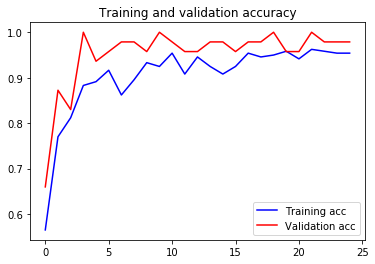

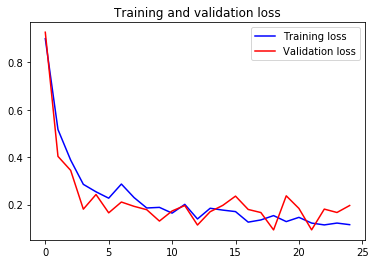

In [117]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

# Predict using fine-tuned VGG16 model

/home/laus/.virtualenvs/virtual-py3/lib/python3.5/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


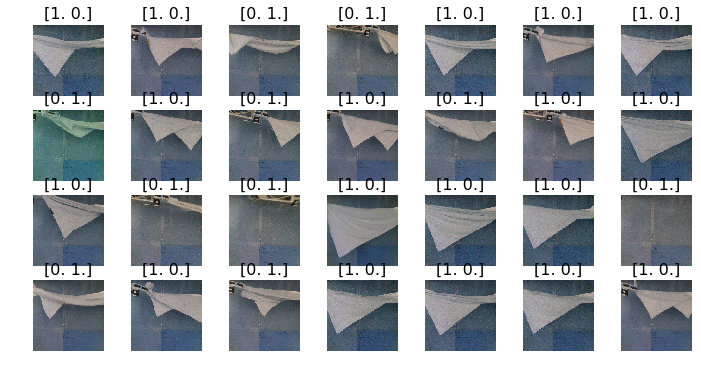

In [118]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels, rows=4)

In [119]:
test_labels = test_labels[:,0]
#test_labels

In [120]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
#np.round(predictions)

In [121]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

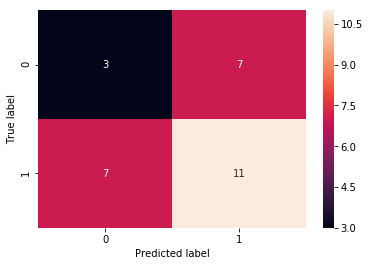

In [122]:
ax = plt.axes()
sns.heatmap(cm,annot=True,fmt='.5g', ax = ax) 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()